In [1]:
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
imagesList=''.join( ["<img style='width: 400px; margin: 0px; float: left; border: 1px solid black; background: #CCC' src='%s' />" % str(s) 
                     for s in ["https://s3.amazonaws.com/thinkific/file_uploads/118220/images/316/eb3/336/1549344770227.jpg",
                              "https://s3.amazonaws.com/thinkific/file_uploads/118220/images/317/ffa/4cf/1549344770283.jpg"] ])
display(HTML(imagesList))

In [3]:
#the first figure is not a time series problem bcz it's constant with respect to time

# Two main things in time series 
------------TREND AND SEASONALITY

In [4]:
Image(url="https://s3.amazonaws.com/thinkific/file_uploads/118220/images/7d7/791/f5e/1549344821475.jpg")

In [5]:
#there is a increasing trend in above figure

In [6]:
Image(url="https://s3.amazonaws.com/thinkific/file_uploads/118220/images/115/9ee/826/1549344821557.jpg")

In [7]:
#you can see there is a peak in Jan and a trough in September 
#So the pattern repeats every 12 months

## Why not use Regression here

1) Understanding Data
2) Hypothesis Generation
3) Getting the system ready and loading the data
4) Dataset Structure and Content
5) Feature Extraction
6) Exploratory Analysis
7) Forecasting using Multiple Modeling Techniques
8) Splitting the data into training and validation part
9) Modeling techniques
10) Holt's Linear Trend Model on daily time series
11) Holt Winter's Model on daily time series
12) Introduction to ARIMA Model 
13) Parameter tuning for ARIMA MODEL
14) SARIMAX Model on daily time series

In [8]:
#Hypothesis generation is done before having a look at the data in 
#order to avoid any bias that may result after the observation

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [10]:
train_original =  pd.read_csv("E://Train_SU63ISt.csv")
test_original  =  pd.read_csv("E://Test_0qrQsBZ.csv")

In [11]:
train = train_original.copy()
test = test_original.copy()

In [12]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [13]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 357.2+ KB
None


In [14]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 59.9+ KB
None


In [15]:
train.shape,test.shape

((18288, 3), (5112, 2))

# Feature Extraction

In [16]:
for i in [train,test,train_original,test_original]:
    i['Datetime'] = pd.to_datetime(i.Datetime,format='%d-%m-%Y %H:%M')

In [17]:
#doesn't included second since second was not present in the 
#original dataset

In [18]:
for i in [train,test,train_original,test_original]:
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour 
    #i['minute'] =i.Datetime.dt.minute  since the minute column is only zero

In [19]:
#the below code extract the day of week from Datetime

In [20]:
train['day of week'] = train['Datetime'].dt.dayofweek

In [21]:
def applyzer(x):
    if (x.dayofweek==5) or (x.dayofweek==6):
        return 1
    else:
        return 0

In [22]:
train['weekend'] = train['Datetime'].apply(applyzer)

In [23]:
#5 and 6 are saturday and sunday respectively so i gave 1 for these
#values since they are in weekend and 0 when other day 

In [24]:
train.index

RangeIndex(start=0, stop=18288, step=1)

In [25]:
#changing the index of train to dates

In [26]:
train.index = train.Datetime

In [27]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [28]:
#train.drop('ID',axis=1,inplace=True)

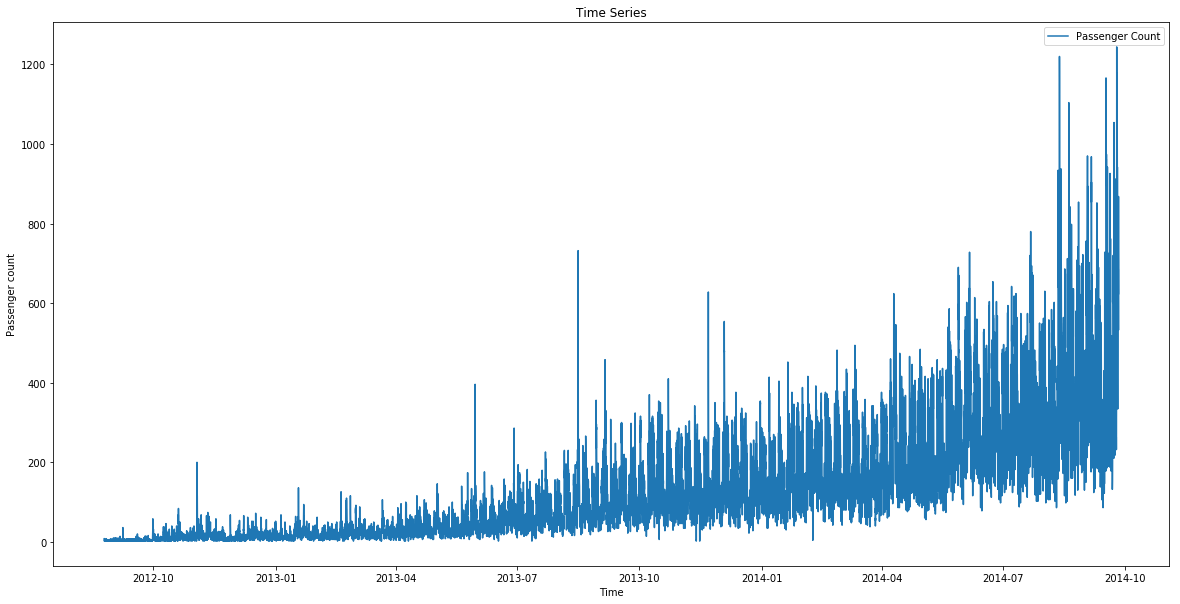

In [29]:
plt.figure(figsize=(20,10))
plt.plot(train['Count'],label='Passenger Count')
plt.xlabel('Time')
plt.ylabel('Passenger count')
plt.title('Time Series')
plt.legend(loc='best')

In [30]:
#clearly one can see the trend is increasing so that means our 
#hypothesis that traffic will increase as the year pass by

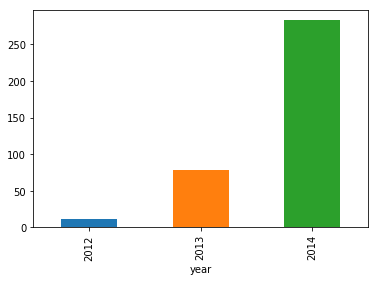

In [31]:
train.groupby('year')['Count'].mean().plot(kind='bar')

In [32]:
#this proves that the traffic is increasing as the year passes by

In [33]:
#but that doesn't mean every time costumer increases in each month
#or time the above graph only shows the average traffic
#over year increases

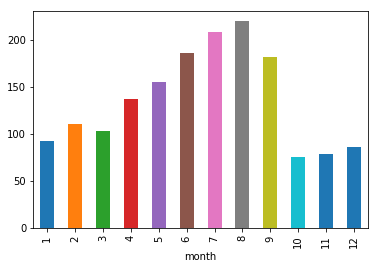

In [34]:
train.groupby('month')['Count'].mean().plot(kind='bar')

In [35]:
#most traffic can be seen in the month of August

In [36]:
train.groupby(['year','month'])['Count'].mean()

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

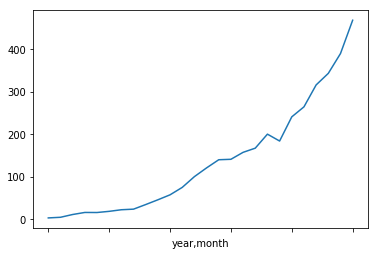

In [37]:
train.groupby(['year','month'])['Count'].mean().plot()

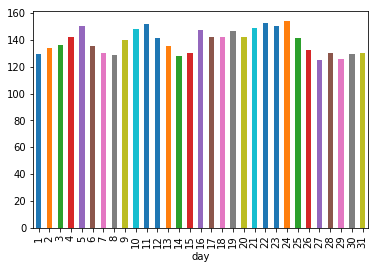

In [38]:
train.groupby(['day'])['Count'].mean().plot(kind='bar')

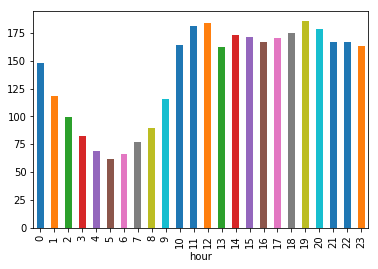

In [39]:
train.groupby(['hour'])['Count'].mean().plot(kind='bar')

In [40]:
#traffic is more in office hours as suggested in hypothesis

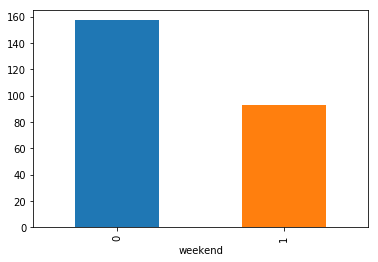

In [41]:
train.groupby(['weekend'])['Count'].mean().plot(kind='bar')

In [42]:
#more traffic on weekdays 

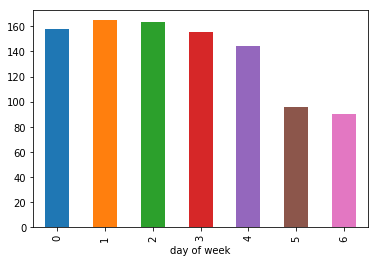

In [43]:
train.groupby(['day of week'])['Count'].mean().plot(kind='bar')

In [44]:
#passenger count is less on saturday and sunday

In [45]:
#since there is lot of noise in the data we will convert the data hour to day, hour to month,hour to year

In [46]:
hourly = train.resample('H').mean()

In [47]:
daily = train.resample('D').mean()

In [48]:
weekly = train.resample('W').mean()

In [49]:
monthly = train.resample('M').mean()

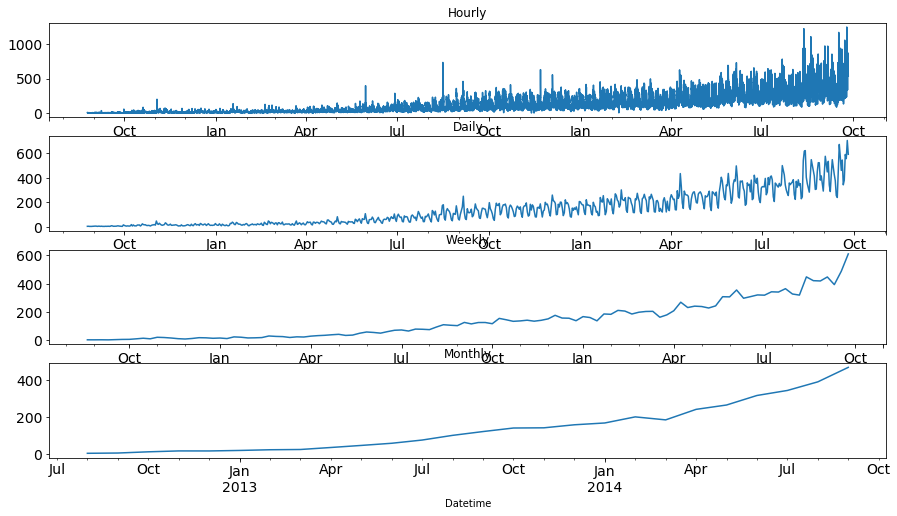

In [50]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

In [51]:
test.index = test.Datetime
#test.drop('ID',axis=1,inplace=True)

In [52]:
#test.drop('ID',axis=1,inplace=True)

In [53]:
test = test.resample('D').mean()
train = train.resample('D').mean()

In [54]:
train.head()

,ID,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,59.5,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,83.5,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,107.5,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [55]:
X = train.drop('Count',axis=1).copy()
y = train.Count.copy()

In [56]:
(len(y)-3)/3

253.0

In [57]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=4)

In [58]:
for train_index, test_index in tscv.split(X):
    (X_train, X_test) = (X.iloc[train_index], X.iloc[test_index]) 
    (y_train,y_test) = (y.iloc[train_index], y.iloc[test_index])

In [59]:
X_train.shape

(610, 7)

In [60]:
X_test.shape

(152, 7)

In [61]:
127/(127+635)

0.16666666666666666

In [62]:
#plotting the train and validation set

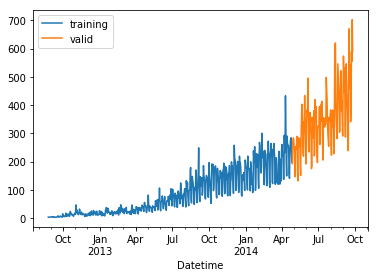

In [63]:
y_train.plot(label='training')
y_test.plot(label='valid')
plt.legend()

## Techniques used to predict the value of Count
   ### 1) Naive Approach 
   ### 2) Moving Average
   ### 3) Simple Exponential Smoothing
   ### 4) Holt's Linear Trend Model

In [64]:
last = y_train.iloc[len(y_train)-1]
last

196.75

In [65]:
pred1 = pd.Series(np.ones(len(y_test))*last)
pred1.index = y_test.index

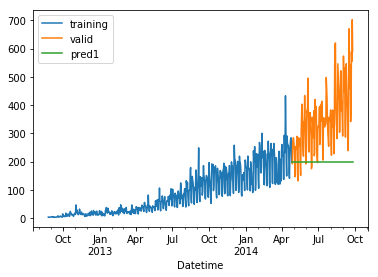

In [66]:
y_train.plot(label='training')
y_test.plot(label='valid')
pred1.plot(label='pred1')
plt.legend()

In [67]:
#finding the root mean square error
from sklearn.metrics import mean_squared_error

In [68]:
np.sqrt(mean_squared_error(y_test,pred1))

189.09177296216163

In [69]:
y_train.tail(10).mean()

229.5166666666667

In [70]:
train['Count'].rolling(10).mean().iloc[-1]

539.6083333333331

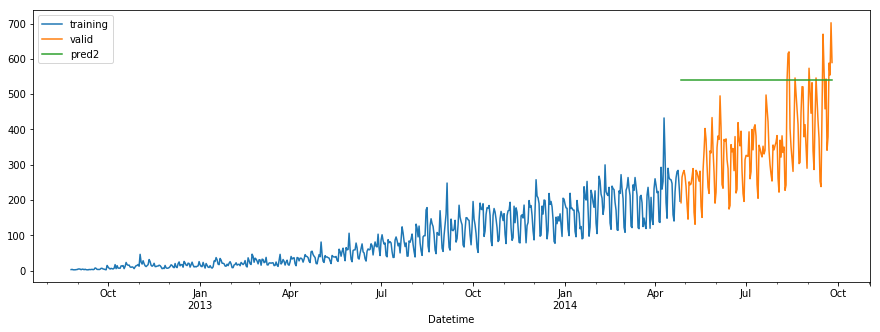

In [71]:
pred2 = pd.Series(np.ones(len(y_test))*train['Count'].rolling(10).mean().iloc[-1])   # average of last 10 observations.
pred2.index = y_test.index   
plt.figure(figsize=(15,5)) 
y_train.plot(label='training')
y_test.plot(label='valid')
pred2.plot(label='pred2')
plt.legend()
 


In [72]:
pred2.value_counts()

539.608333    152
dtype: int64

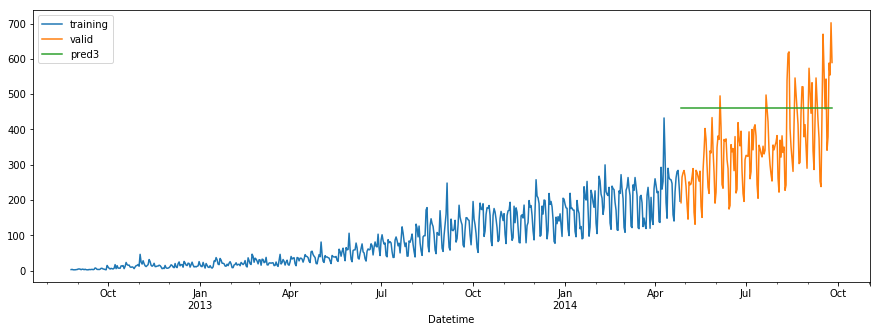

In [73]:
pred3 = pd.Series(np.ones(len(y_test))*train['Count'].rolling(20).mean().iloc[-1])   # average of last 10 observations.
pred3.index = y_test.index   
plt.figure(figsize=(15,5)) 
y_train.plot(label='training')
y_test.plot(label='valid')
pred3.plot(label='pred3')
plt.legend()
 


In [74]:
pred3.value_counts()

460.691667    152
dtype: int64

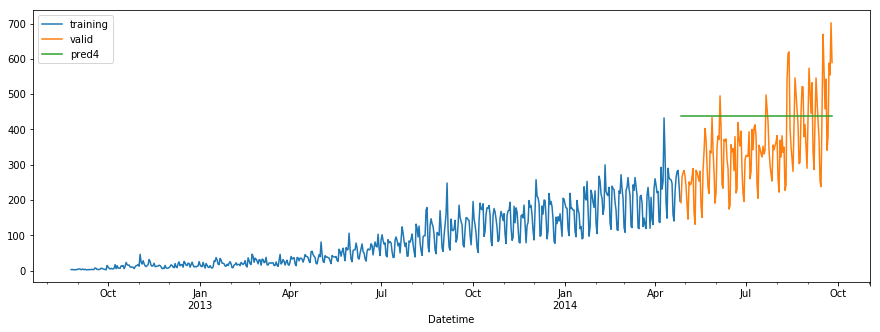

In [75]:
pred4 = pd.Series(np.ones(len(y_test))*train['Count'].rolling(50).mean().iloc[-1])   # average of last 10 observations.
pred4.index = y_test.index   
plt.figure(figsize=(15,5)) 
y_train.plot(label='training')
y_test.plot(label='valid')
pred4.plot(label='pred4')
plt.legend()
 


In [76]:
pred4.value_counts()

437.196667    152
dtype: int64

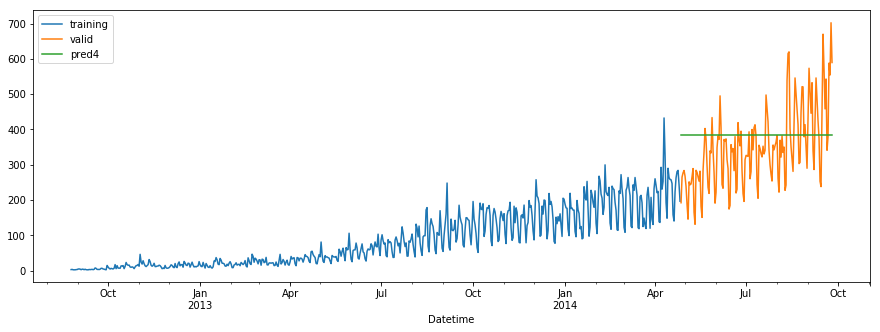

In [77]:
pred101 = pd.Series(np.ones(len(y_test))*train['Count'].rolling(100).mean().iloc[-1])   # average of last 10 observations.
pred101.index = y_test.index   
plt.figure(figsize=(15,5)) 
y_train.plot(label='training')
y_test.plot(label='valid')
pred101.plot(label='pred4')
plt.legend()
 


In [78]:
pred101.value_counts()

384.561667    152
dtype: int64

In [79]:
print(np.sqrt(mean_squared_error(y_test,pred2)))
print(np.sqrt(mean_squared_error(y_test,pred3)))
print(np.sqrt(mean_squared_error(y_test,pred4)))

220.14868153362644
157.19608163418175
141.5786075352585


### Simple Exponential Smoothing 

In [80]:
# IN THIS TECHNIQUE WE PUT LARGE WEIGHT ON RECENT OBSERVATIONS 
# AND SMALLER WEIGHTS ON MORE PREVIOUS PAST OBSERBATIONS
# THE WEIGHTS EXPONENTIALLY DECREASES

In [81]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 

In [82]:
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False) 
pred5 = fit2.forecast(len(y_test))
pred5 = pd.DataFrame([pred5]).T
pred5.index = y_test.index
pred5 = pred5.iloc[:,0]
pred5.value_counts()

608.236462    152
Name: 0, dtype: int64

In [83]:
type(y_test)

pandas.core.series.Series

In [84]:
type(pred5)

pandas.core.series.Series

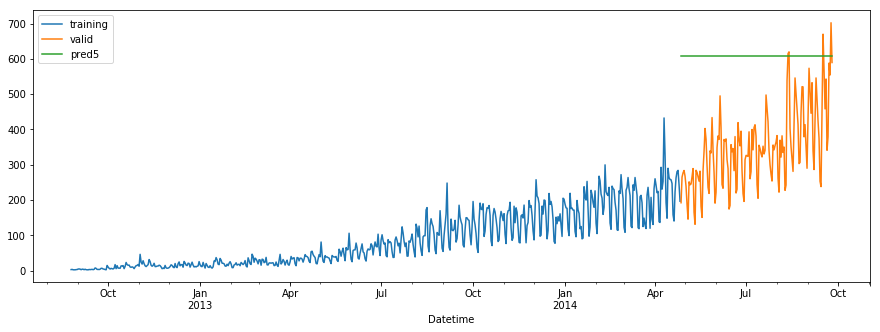

In [85]:
plt.figure(figsize=(15,5)) 
y_train.plot(label='training')
y_test.plot(label='valid')
pred5.plot(label='pred5')
plt.legend()
 


In [86]:
print(np.sqrt(mean_squared_error(y_test,pred5)))

281.5120419540626


## Let us visualize the trend, seasonality and error in the series

In [87]:

# OBSERVED IS THE ORIGINAL TIME SEERIES
# TREND IS JUST TREND 
# SEASONAL TELLS THE SESONALITY IN THE TIME SERIES
# RESIDUAL IS OBTAINED BY REMOVING ANY TREND OR SEASONALITY IN TIME SERIES


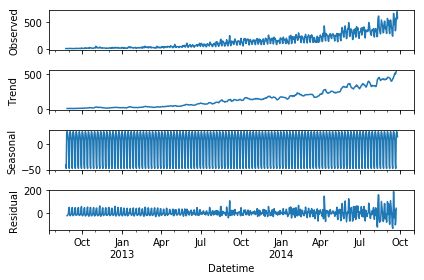

In [88]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 


In [89]:
# AN increasing trend can be seen in the dataset

In [90]:
fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
pred6 = fit1.forecast(len(y_test)) 
pred6 = pd.DataFrame([pred6]).T
pred6.index = y_test.index
pred6 = pred6.iloc[:,0]
#pred6.value_counts()


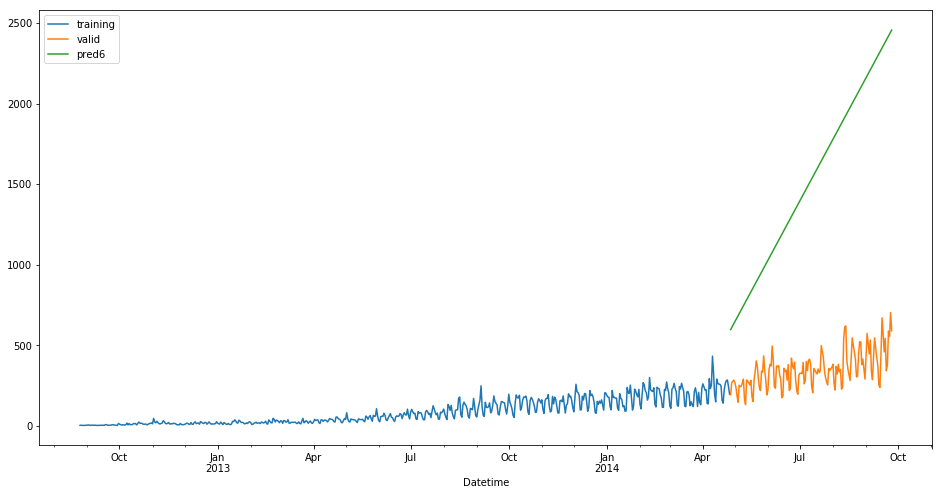

In [91]:
plt.figure(figsize=(16,8)) 
y_train.plot(label='training')
y_test.plot(label='valid')
pred6.plot(label='pred6')
plt.legend()

In [92]:
print(np.sqrt(mean_squared_error(y_test,pred6)))

1271.047913588306


In [93]:
pd.read_csv("E://Sample_Submission_QChS6c3.csv")

,ID,Count


In [94]:
for i in [train_original,test_original]:
    i['Datetime'] = pd.to_datetime(i.Datetime,format='%d-%m-%Y %H:%M')

#
for i in [train_original,test_original]:
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour 
    #i['minute'] =i.Datetime.dt.minute  since the minute column is only zero



In [95]:
train_original.index = train_original.Datetime
test_original.index = test_original.Datetime

In [96]:
predict=fit1.forecast(len(test))
#Let’s save these predictions in test file in a new column.

test['prediction']=predict

In [106]:
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

# Grouping the hourly ratio 
temp=train_original.groupby(['hour'])['ratio'].sum() 

# Groupby to csv format 
temp2 = pd.DataFrame(temp, columns=['hour','ratio'])
temp2=temp2.drop('hour',1)

In [107]:
temp2.head()

,ratio
hour,
0,0.044287
1,0.035343
2,0.029911
3,0.024714
4,0.020802


In [97]:
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 


In [98]:
merge.head()

,ID_x,year,month,day,hour_x,prediction,ID_y,Datetime,hour_y
0,18299.5,2014.0,9.0,26.0,11.5,597.206841,18288,2014-09-26 00:00:00,0
1,18299.5,2014.0,9.0,26.0,11.5,597.206841,18289,2014-09-26 01:00:00,1
2,18299.5,2014.0,9.0,26.0,11.5,597.206841,18290,2014-09-26 02:00:00,2
3,18299.5,2014.0,9.0,26.0,11.5,597.206841,18291,2014-09-26 03:00:00,3
4,18299.5,2014.0,9.0,26.0,11.5,597.206841,18292,2014-09-26 04:00:00,4


In [99]:
merge['hour']=merge['hour_y'] 


In [100]:
merge.head()

,ID_x,year,month,day,hour_x,prediction,ID_y,Datetime,hour_y,hour
0,18299.5,2014.0,9.0,26.0,11.5,597.206841,18288,2014-09-26 00:00:00,0,0
1,18299.5,2014.0,9.0,26.0,11.5,597.206841,18289,2014-09-26 01:00:00,1,1
2,18299.5,2014.0,9.0,26.0,11.5,597.206841,18290,2014-09-26 02:00:00,2,2
3,18299.5,2014.0,9.0,26.0,11.5,597.206841,18291,2014-09-26 03:00:00,3,3
4,18299.5,2014.0,9.0,26.0,11.5,597.206841,18292,2014-09-26 04:00:00,4,4


In [101]:
merge=merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'], axis=1) 
merge.head()

,ID_x,day,prediction,ID_y,hour
0,18299.5,26.0,597.206841,18288,0
1,18299.5,26.0,597.206841,18289,1
2,18299.5,26.0,597.206841,18290,2
3,18299.5,26.0,597.206841,18291,3
4,18299.5,26.0,597.206841,18292,4


In [108]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='hour', how='left') 


In [109]:
prediction.head()

,ID_x,day,prediction,ID_y,hour,ratio
0,18299.5,26.0,597.206841,18288,0,0.044287
1,18299.5,26.0,597.206841,18289,1,0.035343
2,18299.5,26.0,597.206841,18290,2,0.029911
3,18299.5,26.0,597.206841,18291,3,0.024714
4,18299.5,26.0,597.206841,18292,4,0.020802


In [110]:
test.head()

,ID,year,month,day,hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,597.206841
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,609.516231
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,621.825622
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,634.135012
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,646.444402


In [111]:
prediction.head(10)

,ID_x,day,prediction,ID_y,hour,ratio
0,18299.5,26.0,597.206841,18288,0,0.044287
1,18299.5,26.0,597.206841,18289,1,0.035343
2,18299.5,26.0,597.206841,18290,2,0.029911
3,18299.5,26.0,597.206841,18291,3,0.024714
4,18299.5,26.0,597.206841,18292,4,0.020802
5,18299.5,26.0,597.206841,18293,5,0.018621
6,18299.5,26.0,597.206841,18294,6,0.020023
7,18299.5,26.0,597.206841,18295,7,0.023221
8,18299.5,26.0,597.206841,18296,8,0.026741
9,18299.5,26.0,597.206841,18297,9,0.034555


In [112]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [113]:
prediction.head()

,ID_x,day,prediction,ID_y,hour,ratio,Count,ID
0,18299.5,26.0,597.206841,18288,0,0.044287,634.758078,18288
1,18299.5,26.0,597.206841,18289,1,0.035343,506.570155,18289
2,18299.5,26.0,597.206841,18290,2,0.029911,428.714379,18290
3,18299.5,26.0,597.206841,18291,3,0.024714,354.231375,18291
4,18299.5,26.0,597.206841,18292,4,0.020802,298.157619,18292


In [114]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','hour', 'ratio'],axis=1) 
submission

,Count,ID
0,634.758078,18288
1,506.570155,18289
2,428.714379,18290
3,354.231375,18291
4,298.157619,18292
5,266.900250,18293
6,286.990244,18294
7,332.832880,18295
8,383.277829,18296
9,495.278699,18297
